<a href="https://colab.research.google.com/github/pulkit48/BERT-Fine-Tuning/blob/main/Fine%20Tuning%20of%20BERT%20for%20Multilabel%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U accelerate
!pip install -U transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [2]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/IMDB-Movie-Data.csv", usecols=["Description", "Genre"])
df.head()

,Genre,Description
0,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...
1,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te..."
2,"Horror,Thriller",Three girls are kidnapped by a man with a diag...
3,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea..."
4,"Action,Adventure,Fantasy",A secret government agency recruits some of th...


In [3]:
df.shape

(1000, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Genre        1000 non-null   object
 1   Description  1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [5]:
df.duplicated().sum()

0

<Axes: ylabel='Frequency'>

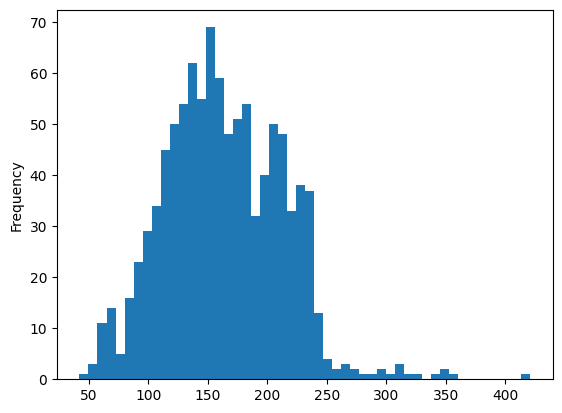

In [6]:
df['Description'].str.len().plot.hist(bins=50)

In [7]:
df["Genre"]=df['Genre'].str.split(',')

In [8]:
genre_counts=[g for gen in df["Genre"] for g in gen]
pd.Series(genre_counts).value_counts()

Drama        513
Action       303
Comedy       279
Adventure    259
Thriller     195
Crime        150
Romance      141
Sci-Fi       120
Horror       119
Mystery      106
Fantasy      101
Biography     81
Family        51
Animation     49
History       29
Sport         18
Music         16
War           13
Western        7
Musical        5
dtype: int64

In [9]:
from sklearn.preprocessing import MultiLabelBinarizer

In [10]:
multilabel=MultiLabelBinarizer()
labels=multilabel.fit_transform(df["Genre"]).astype('float32')
texts=df["Description"].tolist()

In [11]:
labels
texts[:5]

['A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.',
 'Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.',
 'Three girls are kidnapped by a man with a diagnosed 23 distinct personalities. They must try to escape before the apparent emergence of a frightful new 24th.',
 "In a city of humanoid animals, a hustling theater impresario's attempt to save his theater with a singing competition becomes grander than he anticipates even as its finalists' find that their lives will never be the same.",
 'A secret government agency recruits some of the most dangerous incarcerated super-villains to form a defensive task force. Their first mission: save the world from the apocalypse.']

In [12]:
import torch
from transformers import DistilBertTokenizer,AutoTokenizer
from transformers import DistilBertForSequenceClassification,AutoModelForSequenceClassification
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset

In [13]:
train_texts,val_texts,train_labels,val_labels=train_test_split(texts,labels,
                                                               test_size=0.2,random_state=42)

In [14]:
chk='distilbert-base-uncased'
tokenizer=DistilBertTokenizer.from_pretrained(chk)
model = DistilBertForSequenceClassification.from_pretrained(chk, num_labels=len(labels[0]),
                                                            problem_type="multi_label_classification")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [15]:
labels[0]

array([1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0.], dtype=float32)

In [16]:
# Lets build custom dataset
class CustomDataset(Dataset):
  def __init__(self, texts, labels, tokenizer, max_len=128):
    self.texts = texts
    self.labels = labels
    self.tokenizer = tokenizer
    self.max_len = max_len

  def __len__(self):
    return len(self.texts)

  def __getitem__(self, idx):
    text = str(self.texts[idx])
    label = torch.tensor(self.labels[idx])

    encoding = self.tokenizer(text, truncation=True, padding="max_length", max_length=self.max_len, return_tensors='pt')

    return {
        'input_ids': encoding['input_ids'].flatten(),
        'attention_mask': encoding['attention_mask'].flatten(),
        'labels': label
    }

In [17]:
train_dataset=CustomDataset(train_texts,train_labels,tokenizer)
val_dataset=CustomDataset(val_texts,val_labels,tokenizer)

In [18]:
import numpy as np
from sklearn.metrics import roc_auc_score,f1_score,hamming_loss
from transformers import EvalPrediction
import torch

In [23]:
def multi_labels_metrics(predictions,labels,threshold=0.3):
  sigmoid=torch.nn.Sigmoid()
  probs=sigmoid(torch.Tensor(predictions))

  y_pred=np.zeros(probs.shape)
  y_pred[np.where(probs>=threshold)]=1
  y_true=labels

  f1=f1_score(y_true,y_pred,average='macro')
  roc_auc=roc_auc_score(y_true,y_pred,average='macro')
  hamming=hamming_loss(y_true,y_pred)

  metrics={
      'roc_auc':roc_auc,
      'hamming-loss':hamming,
      'f1':f1
  }

  return metrics



def compute_metrics(p:EvalPrediction):
  preds=p.predictions[0] if isinstance(p.predictions,tuple) else p.predictions
  result=multi_labels_metrics(predictions=preds,labels=p.label_ids)
  return result




In [25]:
from transformers import TrainingArguments,Trainer
args=TrainingArguments(
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    output_dir='./results',
    num_train_epochs=5,
    save_steps=1000,
    save_total_limit=2,
)

trainer=Trainer(model=model,
                args=args,
                train_dataset=train_dataset,
                eval_dataset=val_dataset,
                compute_metrics=compute_metrics)

In [26]:
trainer.train()

Step,Training Loss
500,0.124800


TrainOutput(global_step=500, training_loss=0.12476087951660156, metrics={'train_runtime': 53.1294, 'train_samples_per_second': 75.288, 'train_steps_per_second': 9.411, 'total_flos': 132509921280000.0, 'train_loss': 0.12476087951660156, 'epoch': 5.0})

In [27]:
trainer.evaluate()

{'eval_loss': 0.24571678042411804,
 'eval_roc_auc': 0.6639143032885677,
 'eval_hamming-loss': 0.0975,
 'eval_f1': 0.3915492445117007,
 'eval_runtime': 0.9738,
 'eval_samples_per_second': 205.388,
 'eval_steps_per_second': 25.674,
 'epoch': 5.0}

In [28]:
trainer.save_model("distilbert-finetuned-imdb-multi-label")

In [29]:
import pickle
with open("multi-label-binarizer.pkl","wb") as f:
  pickle.dump(multilabel,f)

In [30]:
!zip -r distilbert.zip "/content/distilbert-finetuned-imdb-multi-label"

  adding: content/distilbert-finetuned-imdb-multi-label/ (stored 0%)
  adding: content/distilbert-finetuned-imdb-multi-label/config.json (deflated 62%)
  adding: content/distilbert-finetuned-imdb-multi-label/training_args.bin (deflated 51%)
  adding: content/distilbert-finetuned-imdb-multi-label/model.safetensors (deflated 8%)


In [31]:
text = "Carol Danvers gets her powers entangled with those of Kamala Khan and Monica Rambeau, forcing them to work together to save the universe."

encoding=tokenizer(text,return_tensors='pt').to(trainer.model.device)
outputs=trainer.model(**encoding)

In [32]:
sigmoid=torch.nn.Sigmoid()
probs=sigmoid(outputs.logits[0].cpu())
preds=np.zeros(probs.shape)
preds[np.where(probs>=0.3)]=1

multilabel.classes_
multilabel.inverse_transform(preds.reshape(1,-1))

[('Action', 'Adventure', 'Comedy')]